In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

Production d'un échantillon de 3000 réalisations d'une variable aléartoire suivant une loi gaussienne centrée en 0 et d'écart-type 1 :

In [2]:
sample = np.random.normal(size=3000)
print (sample[:5])

[-0.32101631  0.99986963  0.52095775 -0.0801759   0.13272852]


Définitions des bornes des bins pour réaliser l'histogramme. Ici 20 bins entre -5 et 5 (21 bornes) :

In [3]:
bins = np.linspace(-5., 5., 21)
print (bins)

[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5  5. ]


On utilise la fonction `histogram` de `numpy` pour compter le nombre d'événements dans chaque bins:

In [4]:
y, bins = np.histogram(sample, bins)
print (y)

[  0   0   0   5  11  56 132 288 459 586 564 438 268 134  45  11   3   0
   0   0]


In [5]:
x = [.5*(x1+x2) for x1,x2 in zip(bins[:-1],bins[1:])]
ey = np.sqrt(y)

In [6]:
plt.errorbar(x, y, xerr=0, yerr=ey, drawstyle='steps-mid')

<ErrorbarContainer object of 3 artists>

Peut se faire directement à l'aide de la fonction `hist` de `matplotlib` (mais on a pas les barres d'erreurs):

(array([  0.,   0.,   0.,   5.,  11.,  56., 132., 288., 459., 586., 564.,
        438., 268., 134.,  45.,  11.,   3.,   0.,   0.,   0.]),
 array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
         0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 20 Patch objects>)

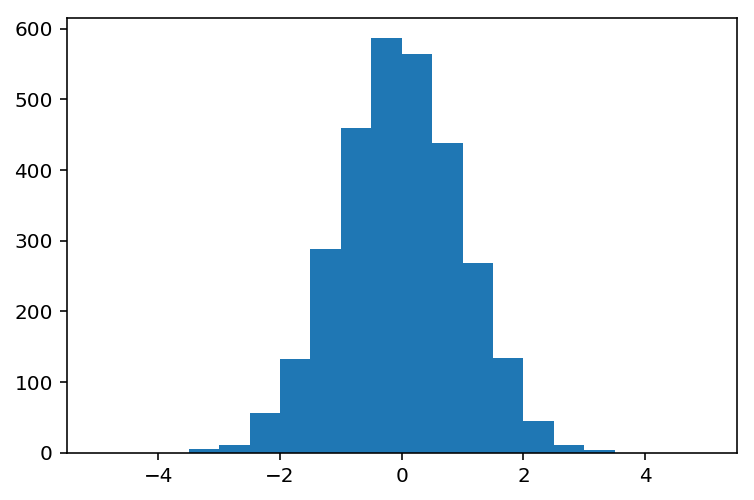

In [7]:
plt.hist(sample, bins)

Normalisation de l'histogramme et comparaison avec la fdp de la variable aléatoire

In [8]:
scale = len(sample)*(bins[1]-bins[0]) # N * Dx
yn = y/scale
ey = np.sqrt(y)/scale
plt.figure(figsize=(10,8))
plt.errorbar(x, yn, xerr=0, yerr=ey, drawstyle='steps-mid', label='hist', lw=2)

xpdf = np.linspace(-5., 5., 100)
ypdf = 1./np.sqrt(2*np.pi)*np.exp(-.5*xpdf**2)
plt.plot(xpdf, ypdf, label='model', lw=3)
plt.legend(fontsize=14)